# **Ejercicios de pair programming Módulo 2 Sprint 2**
## **Limpieza: Lección III**
### **Hipótesis**

1. La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.
2. El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.
3. Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.
4. Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.


Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

- ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?


In [2]:
df_bank = pd.read_csv("data/bank-additional-full-procesado2.csv", index_col = 0)
df_bank.head(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week,month,day
0,56,housemaid,married,basic 4y,No,No,No,telephone,261,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
1,57,services,married,high school,NaN,No,No,telephone,149,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
2,37,services,married,high school,No,Sí,No,telephone,226,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
3,40,administration,married,basic 6y,No,No,No,telephone,151,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
4,56,services,married,high school,No,No,Sí,telephone,307,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'


In [3]:
df_numericas = df_bank.select_dtypes(include=np.number).drop("age", axis=1)
df_numericas.sample(10)

,duration,campaign,pdays,previous,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed"
18442,149,1,999,0,1.4,93.918,-42.7,4.968,5228.1
9348,236,7,999,0,1.4,94.465,-41.8,4.967,5228.1
28908,179,1,999,0,-1.8,93.075,-47.1,1.405,5099.1
2793,188,1,999,0,1.1,93.994,-36.4,4.859,5191.0
35963,87,2,999,0,-1.8,92.893,-46.2,1.264,5099.1
39254,121,2,999,1,-1.8,93.369,-34.8,0.649,5008.7
16774,129,1,999,0,1.4,93.918,-42.7,4.962,5228.1
7358,224,2,999,0,1.1,93.994,-36.4,4.864,5191.0
22271,283,3,999,0,1.4,93.444,-36.1,4.963,5228.1
17876,369,1,999,0,1.4,93.918,-42.7,4.961,5228.1


In [4]:
type(df_numericas)

pandas.core.frame.DataFrame

- Identifica visualmente los outliers




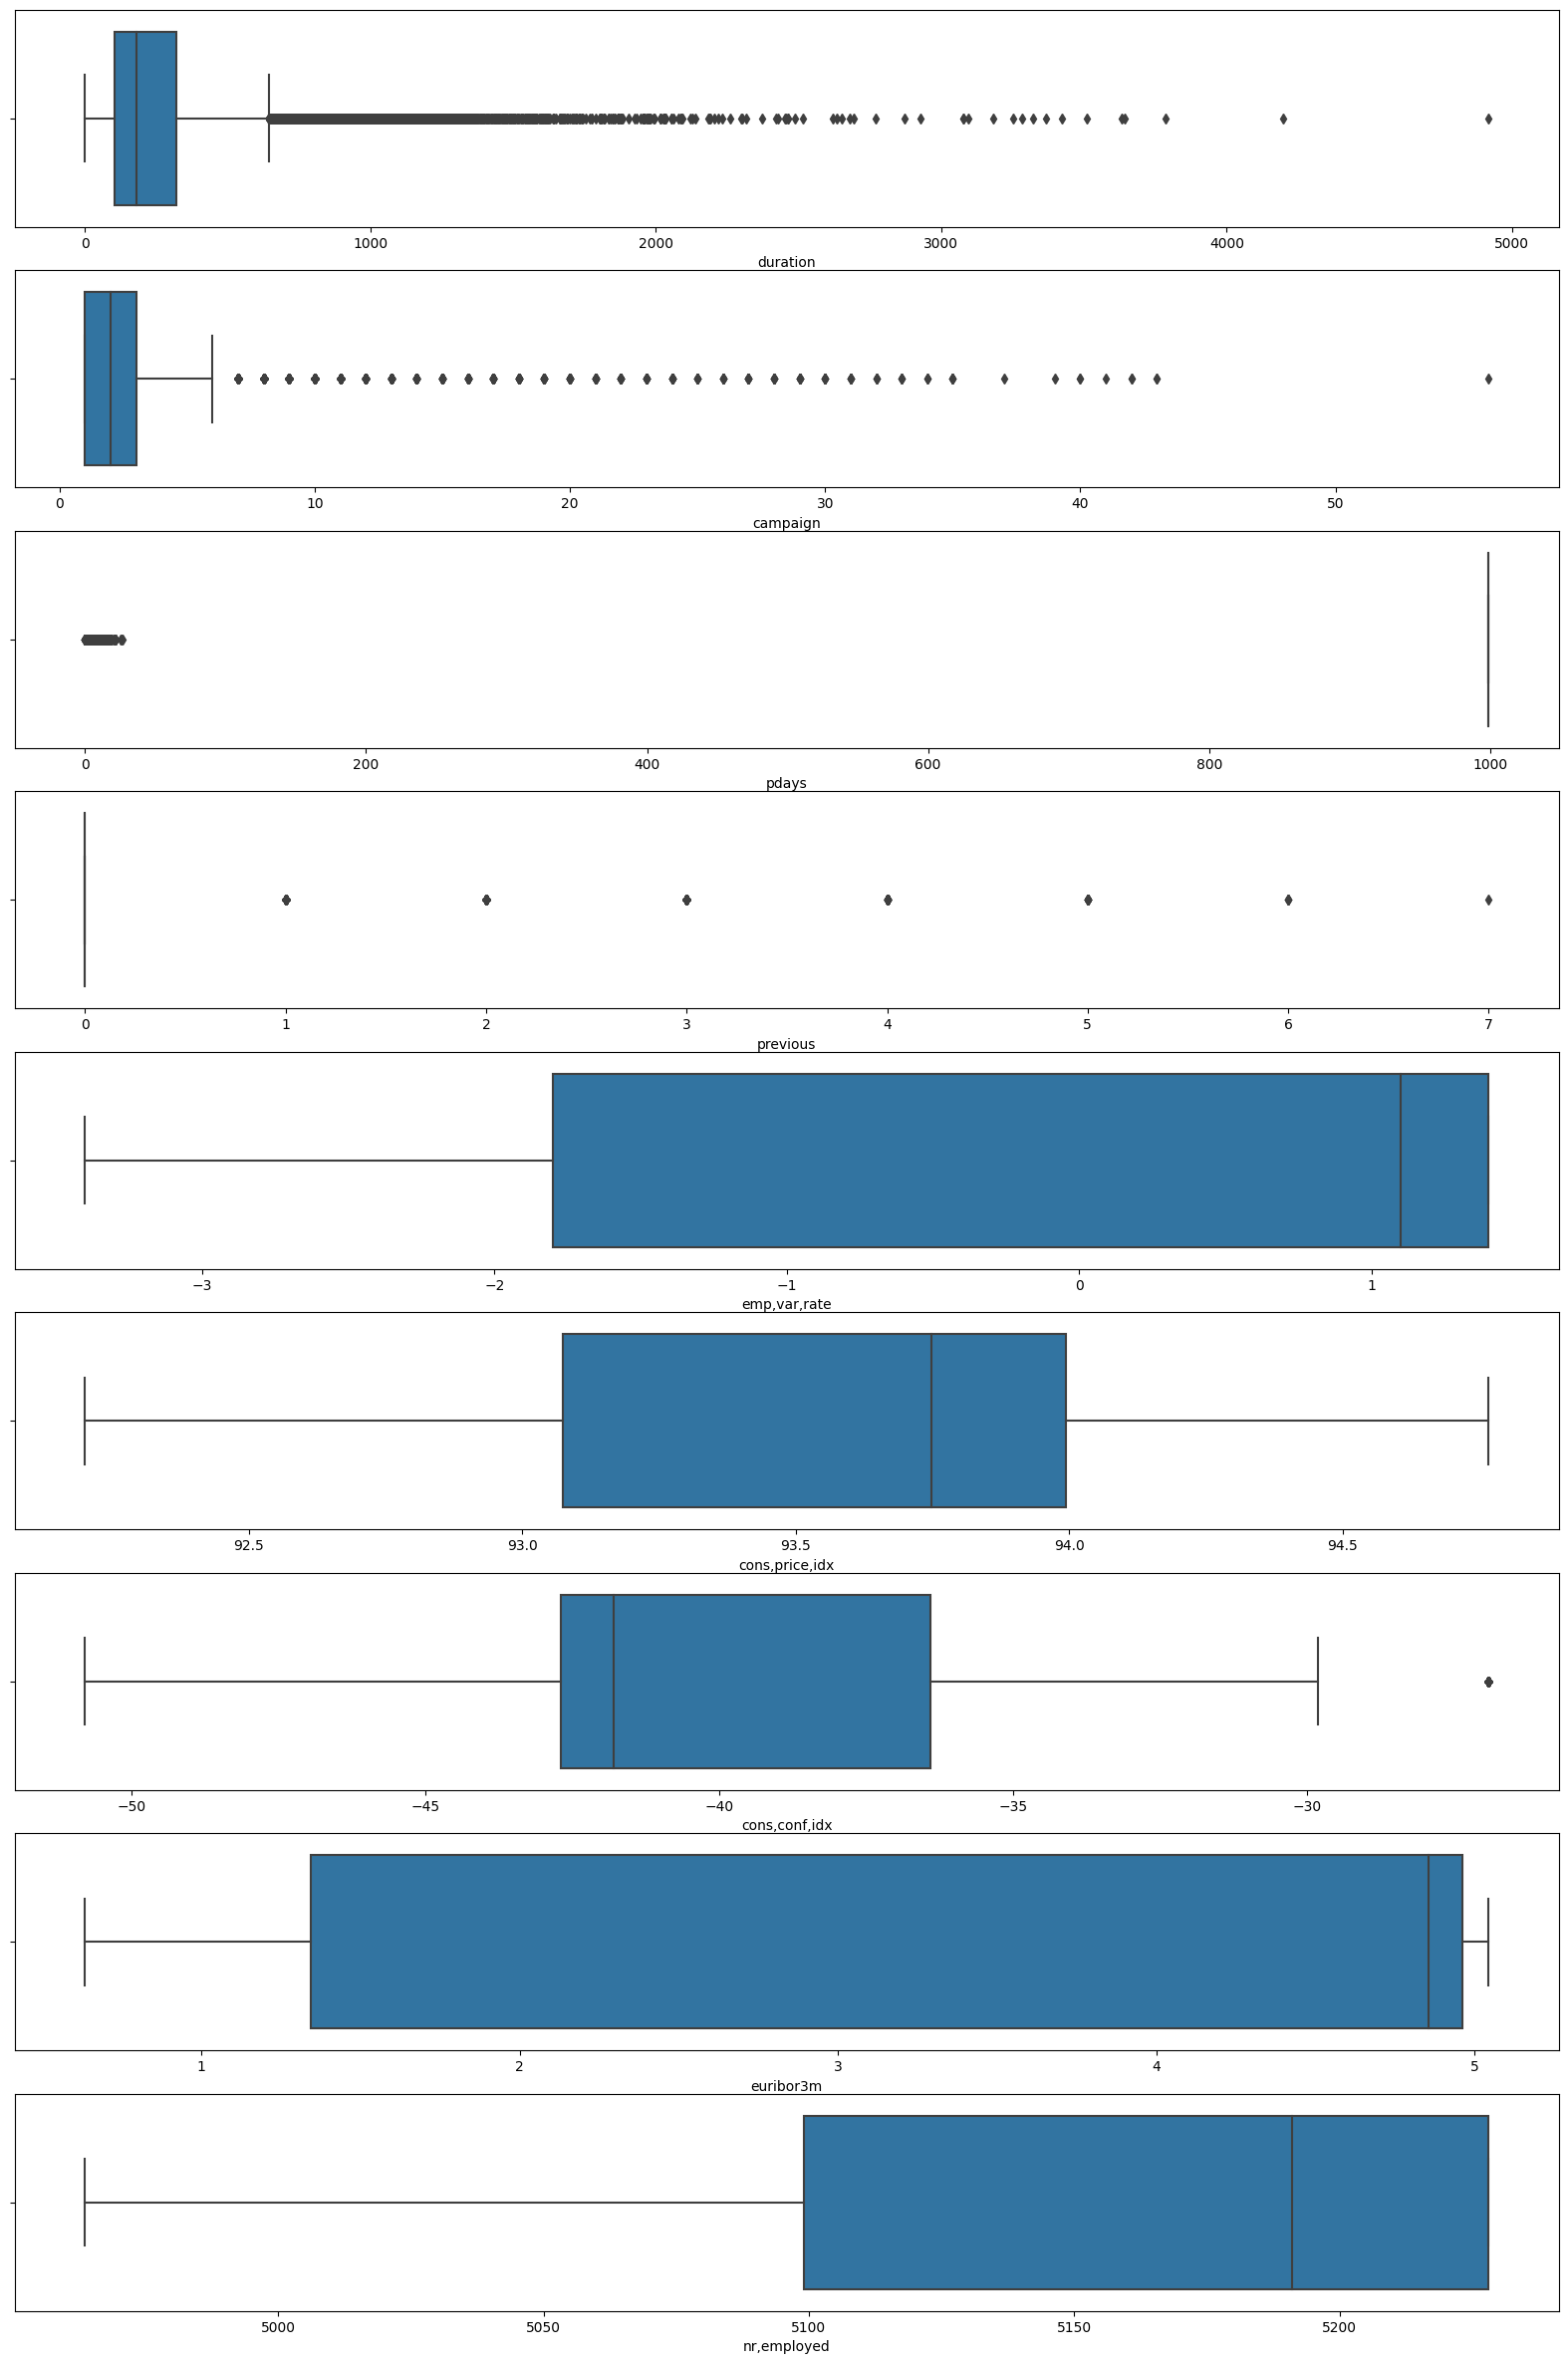

In [5]:
fig, ax = plt.subplots(9, 1, figsize=(20,30))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

- Identifica sobre el dataframe las filas que son outliers


In [6]:

def detectar_outliers(lista_columnas, dataframe): 
    
    """
    Detecta los outliers en el dataframe
    Args: 
        elem (lista): lista de columnas a la que le aplicamos la función.
    Returns:
        El valor modificado en formato diccionario. 
    """
    
    dicc_indices = {} 
    
    
    for col in lista_columnas:
        
        
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR
        
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[col] = (list(outliers_data.index)) 
        

    
    return dicc_indices 

In [7]:
lista_columnas = list(df_numericas.columns)
lista_columnas

['duration',
 'campaign',
 'pdays',
 'previous',
 'emp,var,rate',
 'cons,price,idx',
 'cons,conf,idx',
 'euribor3m',
 'nr,employed']

In [8]:
indices_outliers = detectar_outliers(lista_columnas, df_numericas)
indices_outliers

{'duration': [37,
  57,
  61,
  75,
  83,
  88,
  111,
  131,
  164,
  169,
  182,
  195,
  198,
  199,
  243,
  249,
  276,
  286,
  296,
  329,
  346,
  388,
  389,
  395,
  413,
  431,
  446,
  462,
  467,
  469,
  504,
  539,
  556,
  575,
  590,
  614,
  659,
  681,
  689,
  719,
  723,
  773,
  806,
  820,
  832,
  840,
  844,
  856,
  876,
  913,
  937,
  943,
  967,
  981,
  987,
  1001,
  1005,
  1020,
  1053,
  1059,
  1077,
  1078,
  1113,
  1114,
  1124,
  1129,
  1166,
  1233,
  1256,
  1269,
  1283,
  1299,
  1305,
  1318,
  1348,
  1365,
  1367,
  1368,
  1396,
  1414,
  1442,
  1444,
  1470,
  1501,
  1505,
  1525,
  1538,
  1551,
  1568,
  1614,
  1624,
  1632,
  1636,
  1655,
  1662,
  1689,
  1691,
  1707,
  1720,
  1725,
  1763,
  1766,
  1791,
  1809,
  1810,
  1819,
  1839,
  1847,
  1852,
  1853,
  1869,
  1906,
  1938,
  1980,
  1984,
  1995,
  2000,
  2039,
  2064,
  2076,
  2082,
  2090,
  2097,
  2104,
  2105,
  2110,
  2126,
  2130,
  2132,
  2143,
  2260,
 

- Reemplaza los outliers por el estadístico más correcto.


In [9]:

for k, v in indices_outliers.items():
    mediana = df_numericas[k].median() 
    for i in v: 
        df_numericas.loc[i,k] = mediana

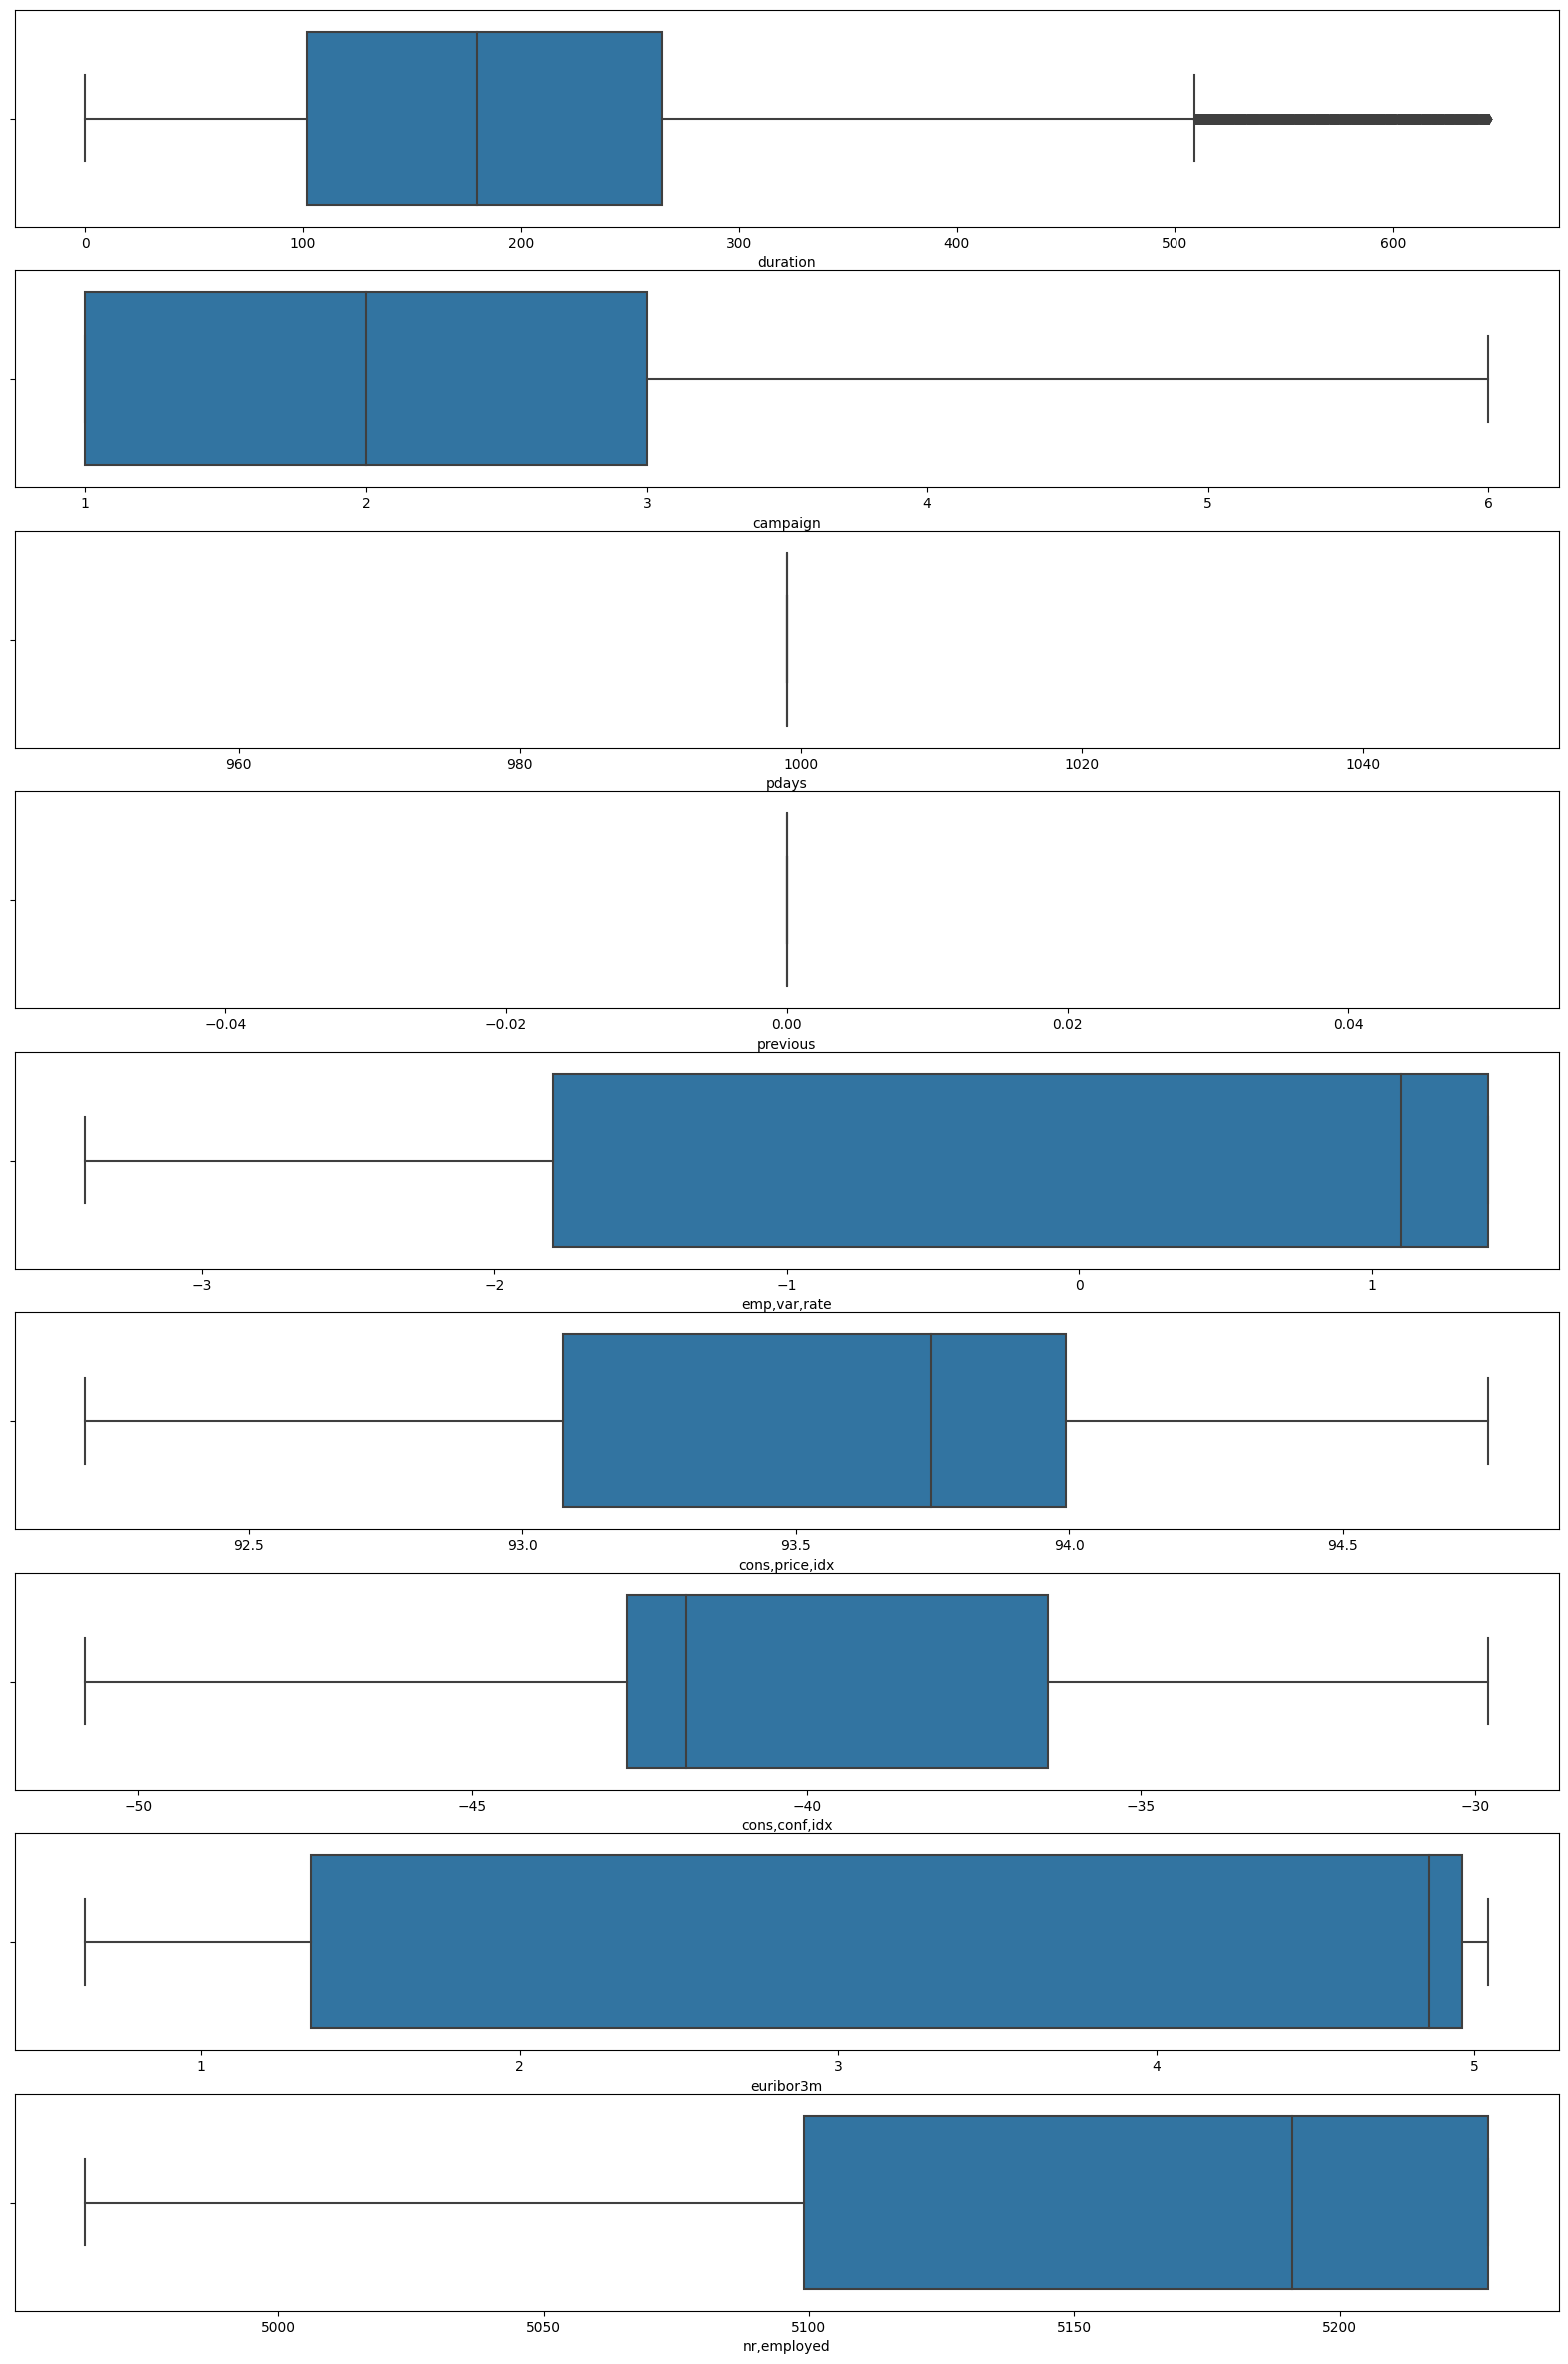

In [10]:
fig, ax = plt.subplots(9, 1, figsize=(20,30))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [11]:
df_bank.to_csv("data/bank-additional-full-procesado3.csv")

- Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.